In [58]:
#Import de benodigde libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#ijd, en tijdstappen
teind = 0.8
Nstap = 100000+1
tijd = np.linspace(0, teind, Nstap)
dt = teind/(Nstap-1)

# Eigen aangereikte parameters, bijzonder per student.
k = 1.2808 #N/m
m = 5.1909*10**-9 #microgram
c = 2.3297*10**-6 #kg/s

#Uitgerekende waardes voor de diferentiaal vergelijking.
a = (k - 2*m/(dt**2))/(m/(dt**2)+c/(2*dt))
b = (m/(dt**2)-c/(2*dt))/(m/(dt**2)+c/(2*dt))

# Berekenen van de eigen frequentie
res_f = 1/(np.sqrt((m/k))*2*np.pi)
f = res_f
print(f)

2499.9968407106567


In [60]:
V0 = 15 #V
Vdrive = 1.5 #V
Eo = 8.854*10**-12
w = 3*10**-6
d = 2*10**-6

In [61]:
Vt = np.zeros_like(tijd)
for tv in range(1,Nstap-1):
    Vt[tv+1] = V0 + Vdrive*np.cos((2*np.pi*f)*tijd[tv])

In [62]:
Fel = np.zeros_like(tijd)
for tf in range(1, Nstap-1):
    Fel[tf + 1] = (0.5*Vt[tf]**2*Eo*w)/d

In [63]:
Fel0 = Fel/(m/(dt**2)+c/(2*dt))

In [64]:
tijd_stuk = tijd[99300:99900]
Fel0_stuk = Fel0[99300:99900]

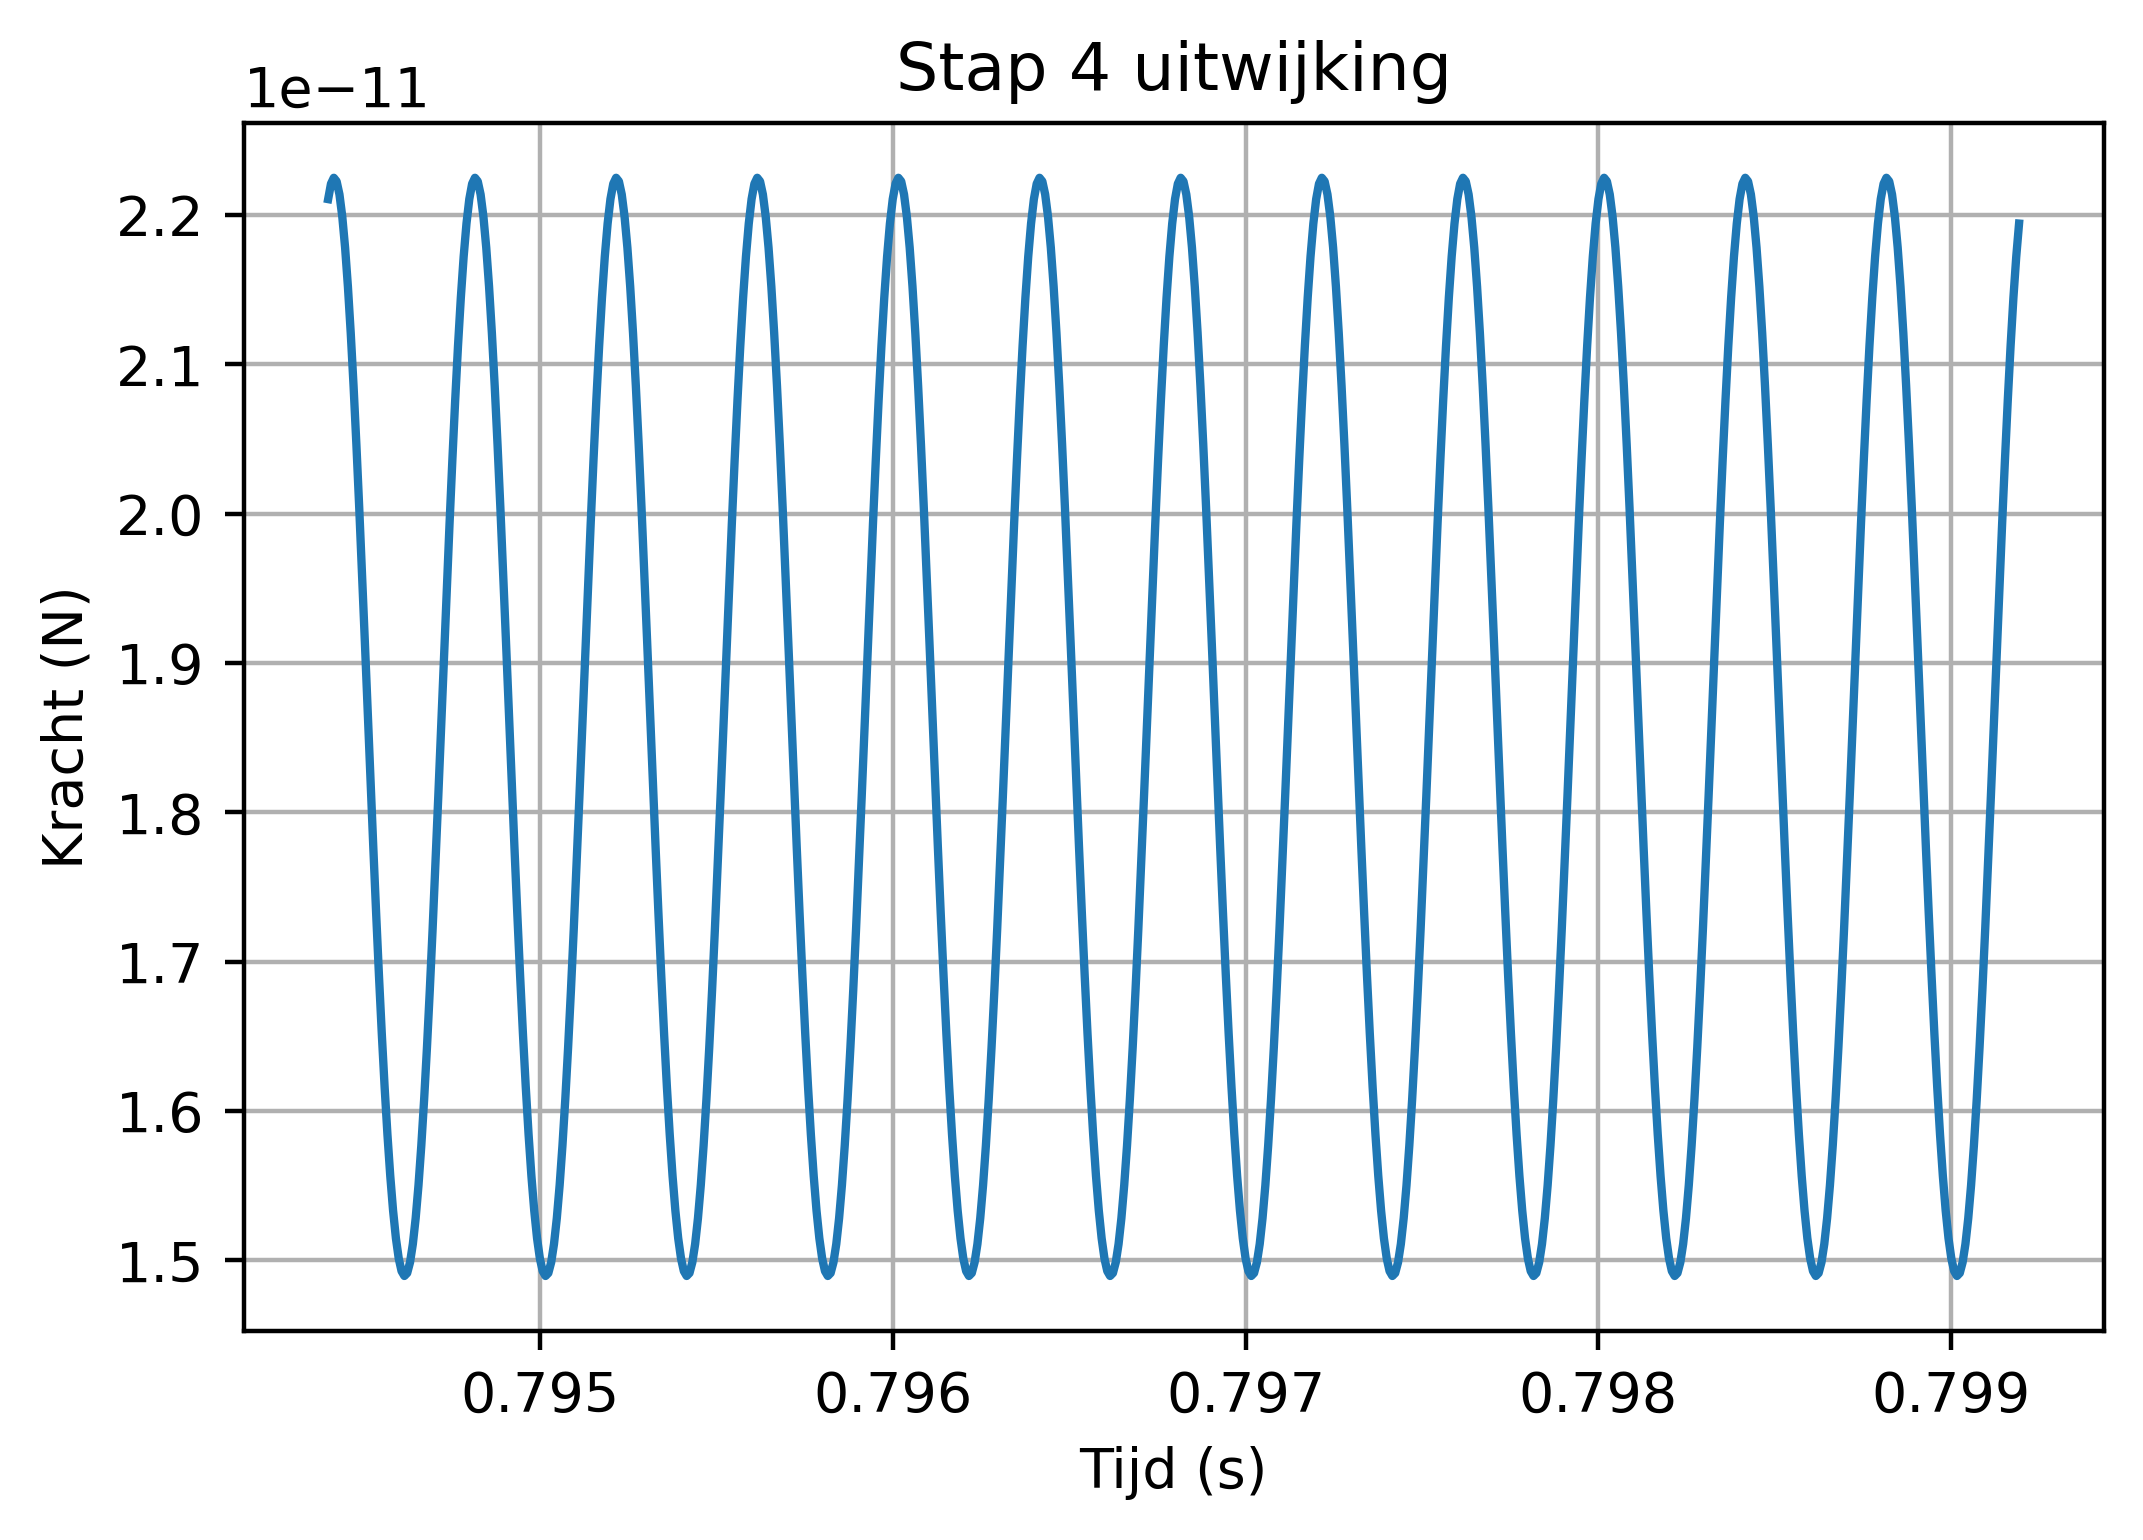

In [65]:
plt.figure(dpi = 400)
plt.xlabel("Tijd (s)")
plt.ylabel("Kracht (N)")
plt.title("Stap 4 uitwijking")
plt.grid()
plt.plot(tijd_stuk, Fel0_stuk)

In [66]:
'Stap 2'

'Stap 2'

In [67]:
print(a)

-1.9806529679097349


In [68]:
'Berekenen van de uitwijking'
#Een lijst maken die even lang is als de tijd, zodat 
x = np.zeros_like(tijd)
for ti in range(0,len(x)-1):
    x[ti+1]=-a*x[ti]-b*x[ti-1]+Fel0[ti]*np.sin(2*np.pi*f*tijd[ti])
print(len(x))

100001


In [69]:
x_stuk = x[99300:99900]

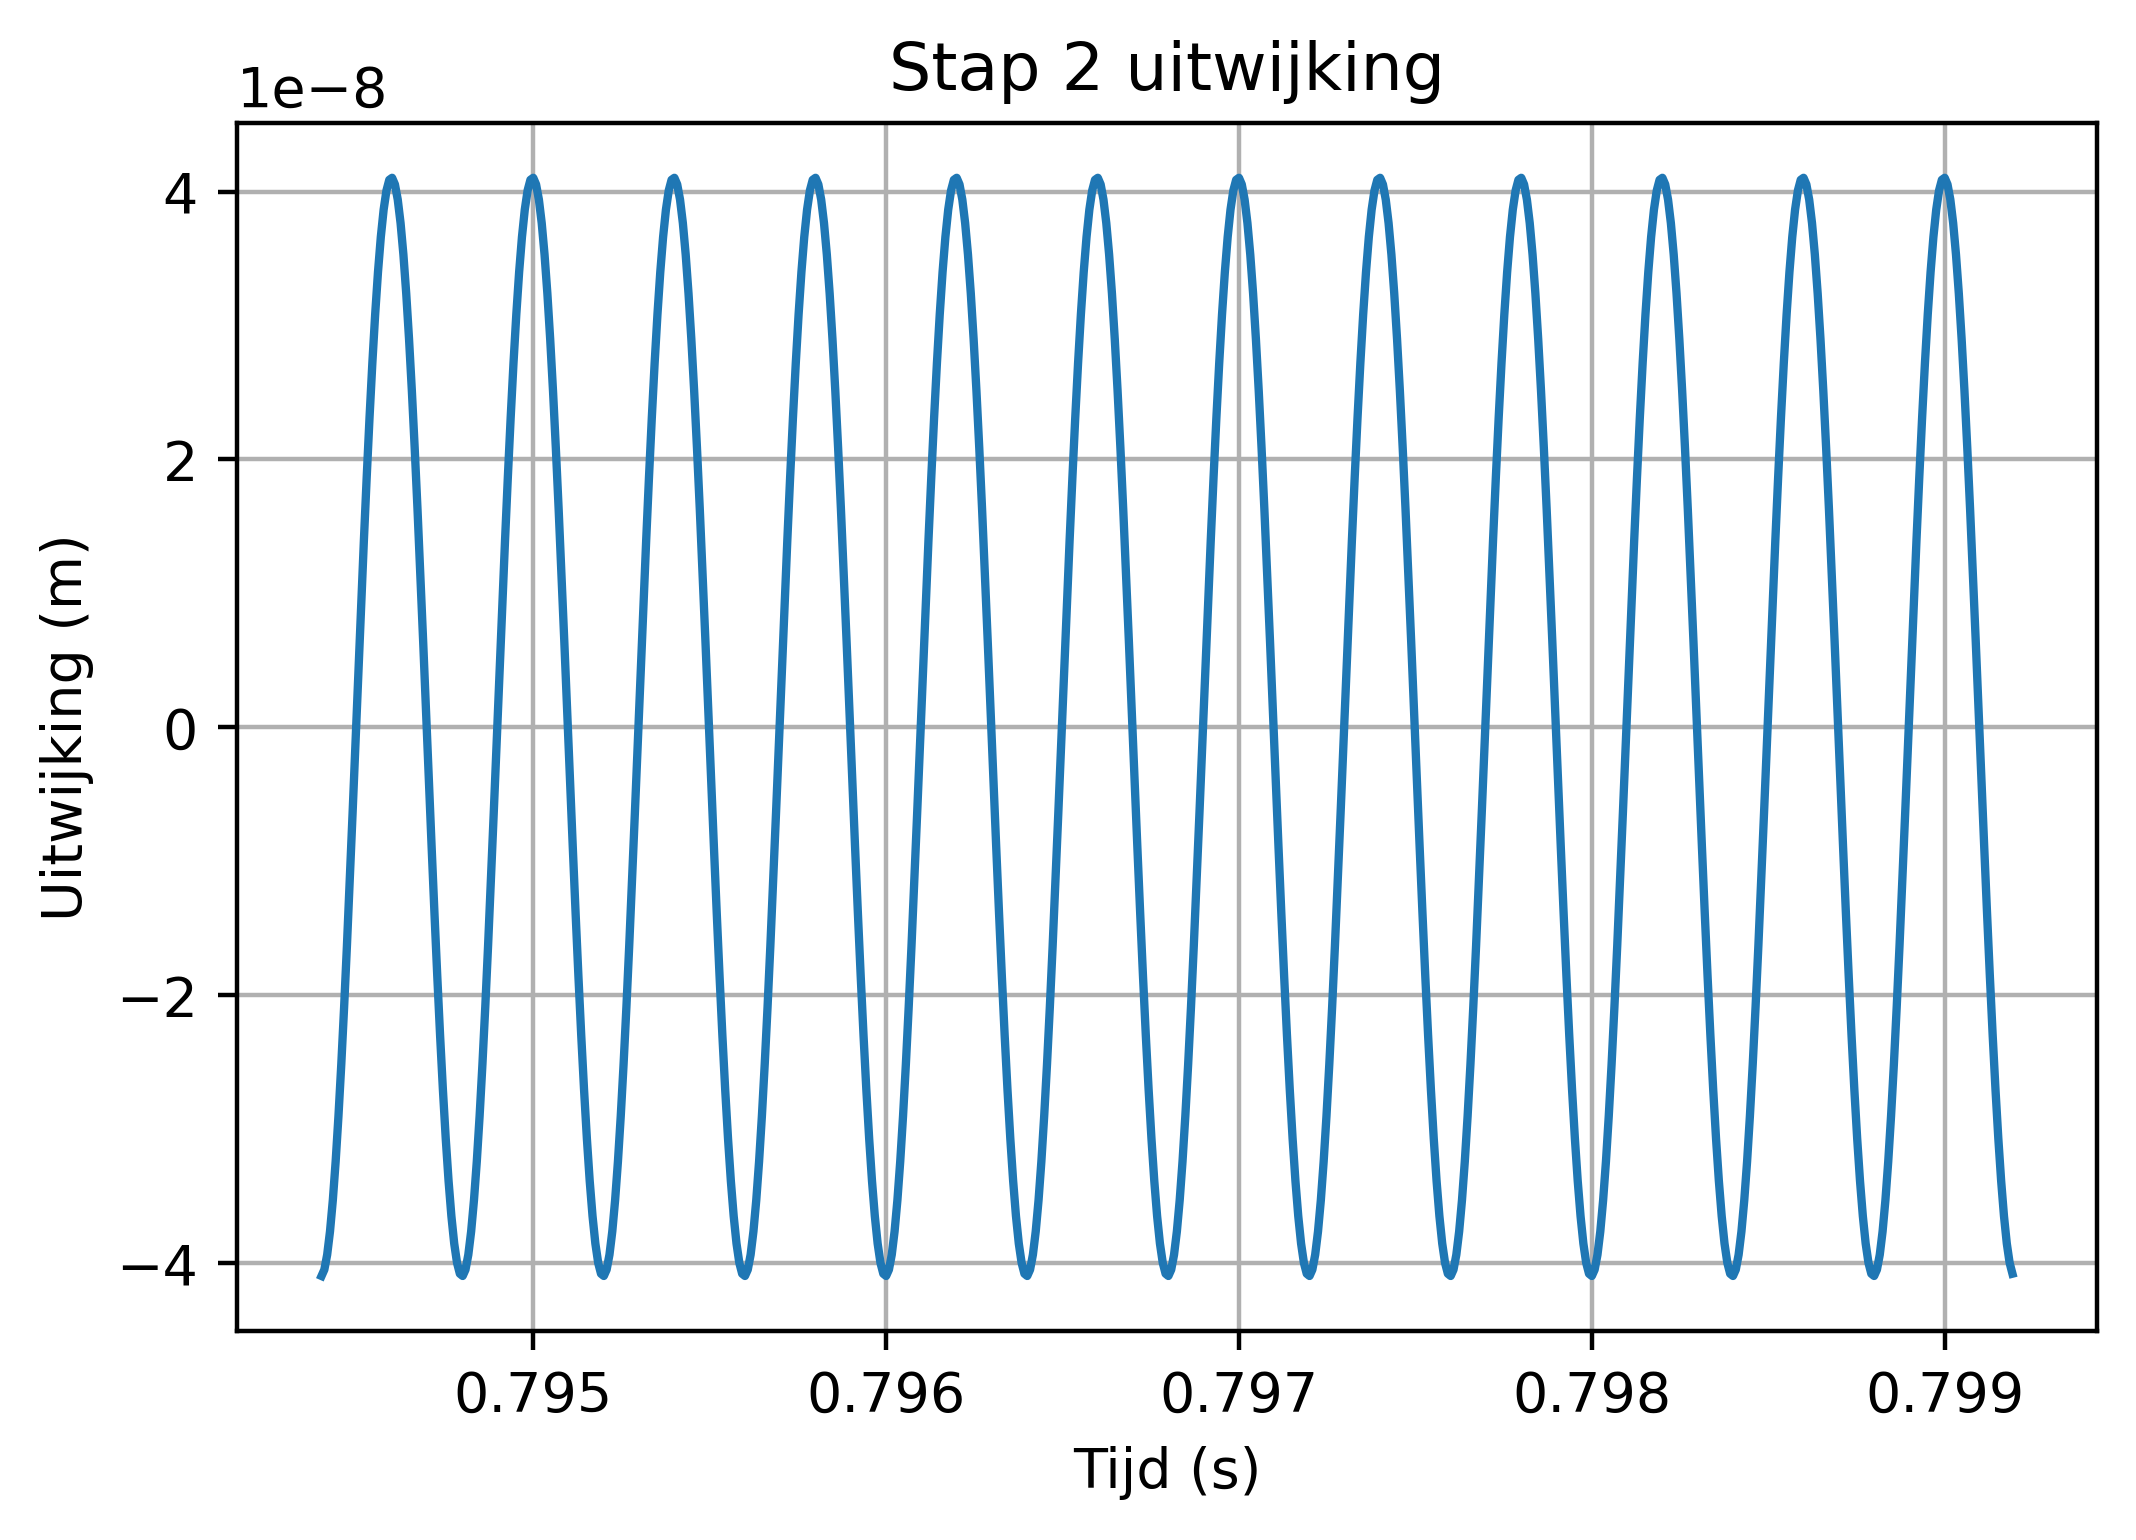

In [70]:
plt.figure(dpi = 400)
plt.xlabel("Tijd (s)")
plt.ylabel("Uitwijking (m)")
plt.title("Stap 2 uitwijking")
plt.grid()
plt.plot(tijd_stuk, x_stuk)

In [71]:
vx = np.zeros_like(tijd)
for tv in range(1,len(vx)-1):
    vx[tv+1]= (x[tv-1] - x[tv])/dt

In [72]:
vx_stuk = vx[99300:99900]

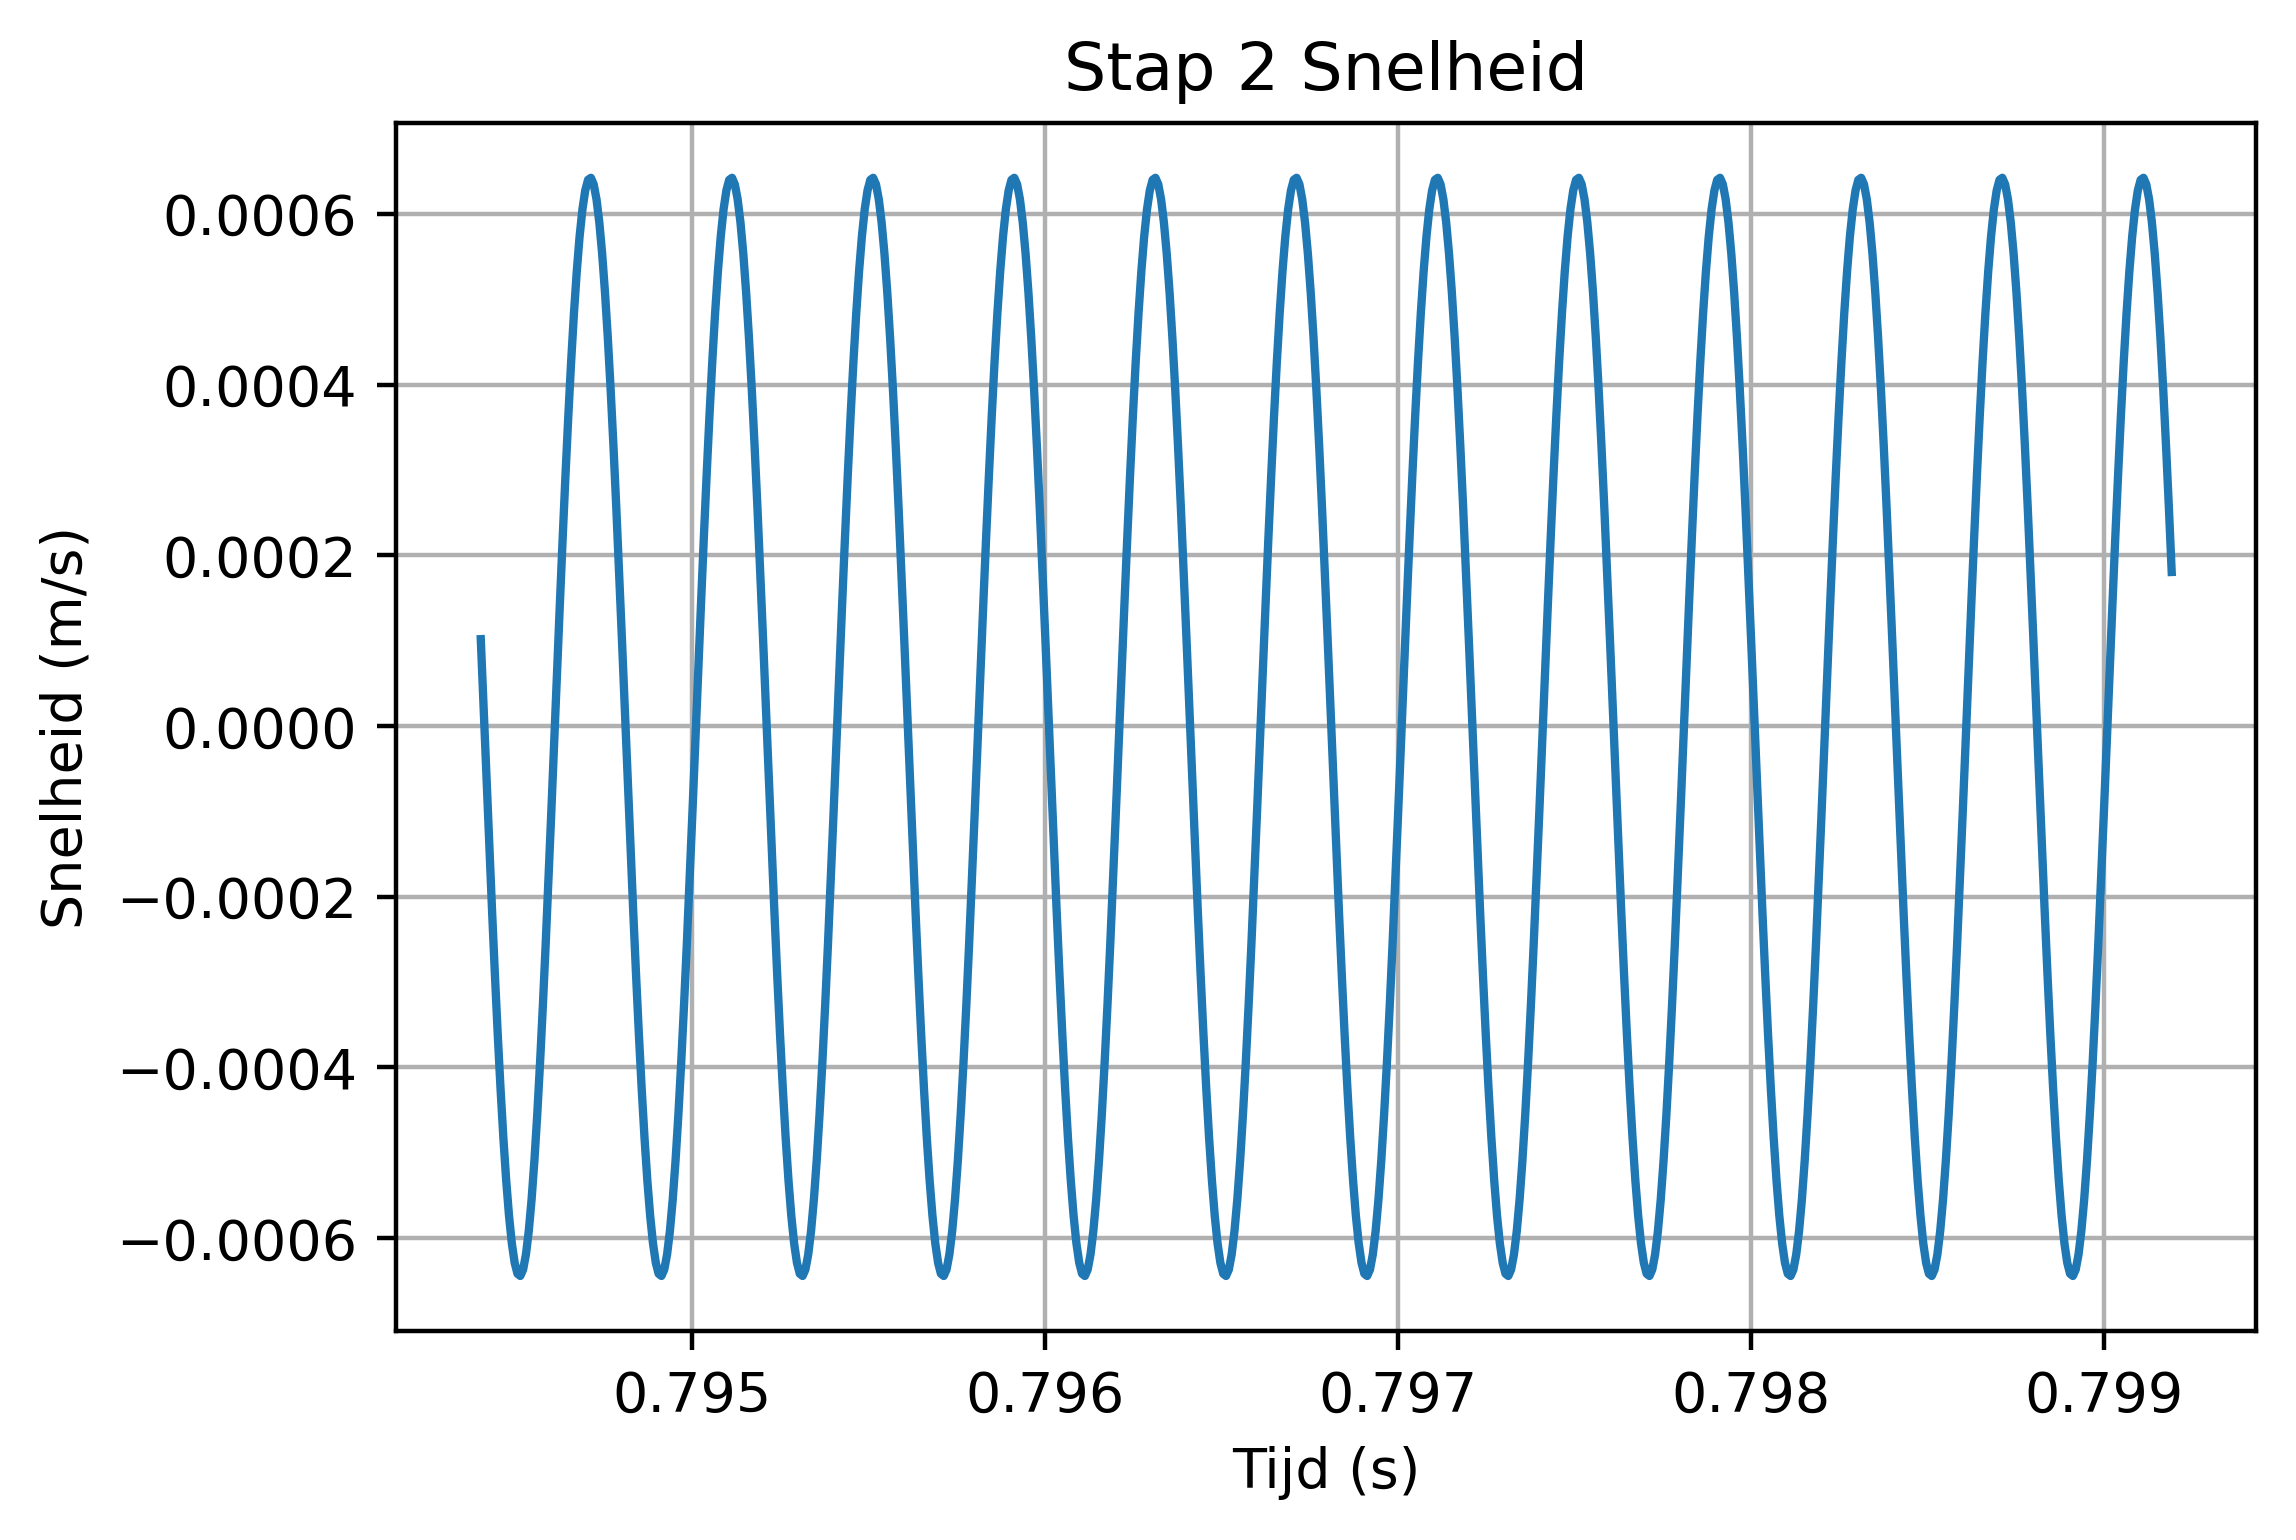

In [73]:
plt.figure(dpi = 400)
plt.xlabel("Tijd (s)")
plt.ylabel("Snelheid (m/s)")
plt.title("Stap 2 Snelheid")
plt.grid()
plt.plot(tijd_stuk, vx_stuk)

In [74]:
'Stap 3'

'Stap 3'

In [75]:
Omega = 10 #rad/min
Fcoriolis = np.zeros_like(tijd)
Fcoriolis[0] = 0
for yp in range (1,len(Fcoriolis)-1):
    Fcoriolis[yp+1] = -2*m*Omega*vx[yp]

In [76]:
Fcoriolis_stuk = Fcoriolis[99300:99900]

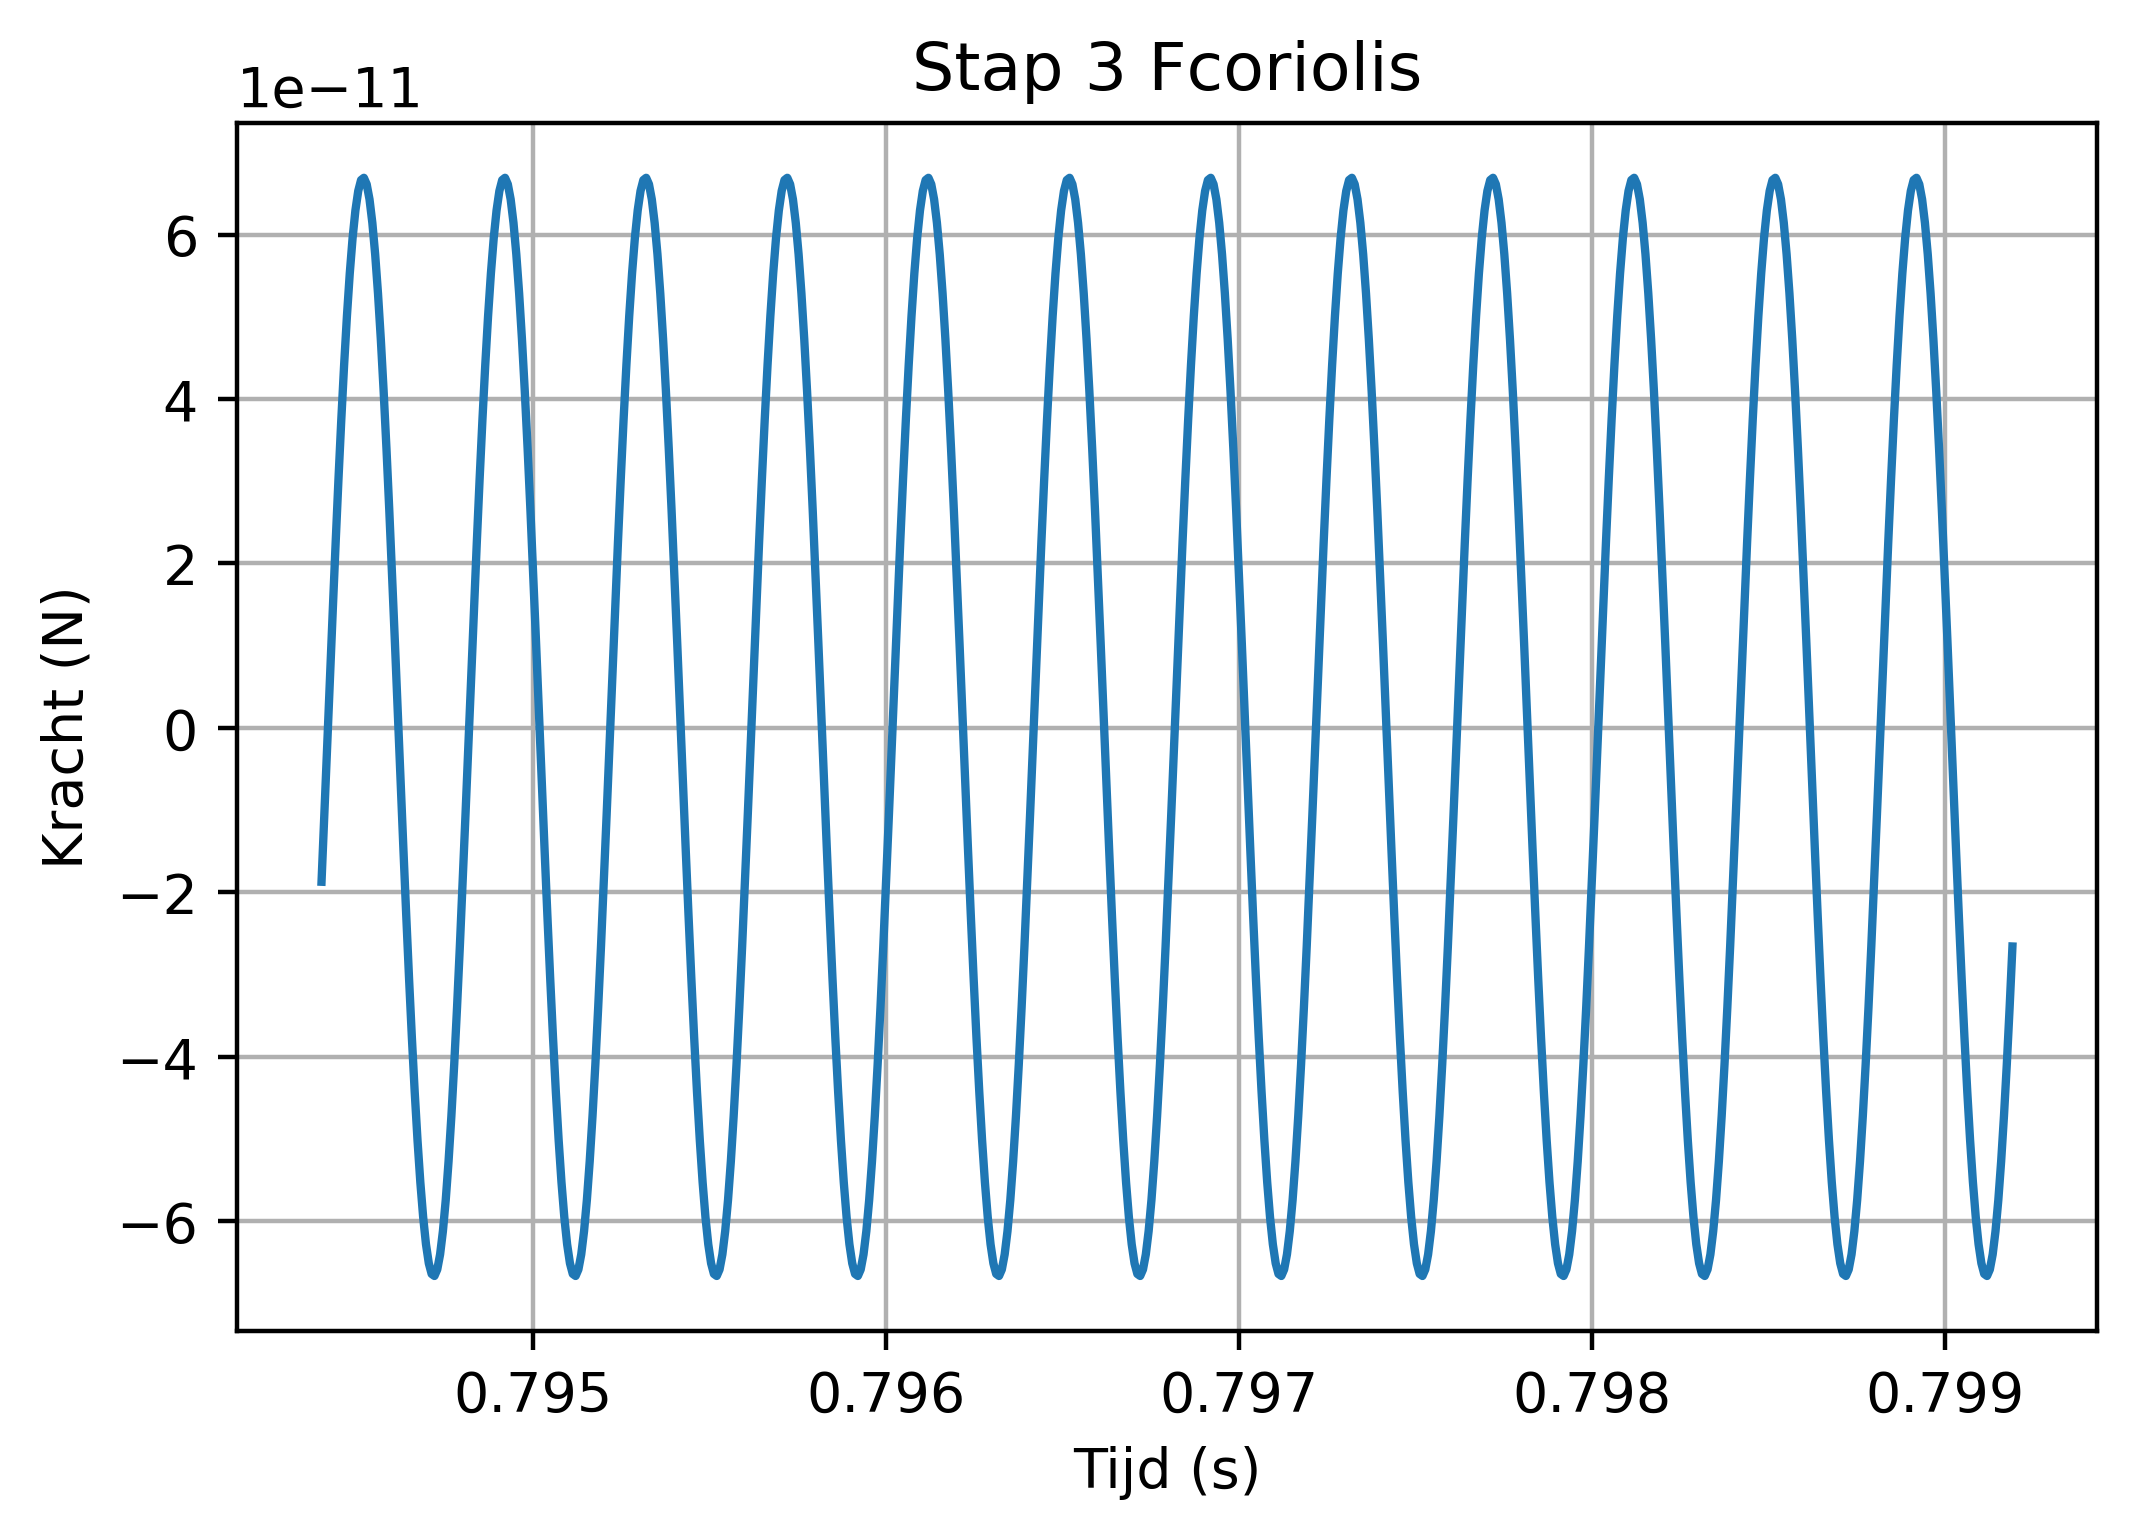

In [77]:
plt.figure(dpi = 400)
plt.xlabel("Tijd (s)")
plt.ylabel("Kracht (N)")
plt.title("Stap 3 Fcoriolis")
plt.grid()
plt.plot(tijd_stuk, Fcoriolis_stuk)

In [78]:
'Stap 4'

'Stap 4'

In [79]:
m_sense = 6.2291*10**-9 #microgram
k_sense = 6.1479 #N/m
gamma_sense = 3.9139*10**-6 #kg/s

#Uitgerekende waardes voor de diferentiaal vergelijking.
a = (k_sense - 2*m_sense/(dt**2))/(m_sense/(dt**2)+gamma_sense/(2*dt))
b = (m_sense/(dt**2)-gamma_sense/(2*dt))/(m_sense/(dt**2)+gamma_sense/(2*dt))

In [80]:
y = np.zeros_like(tijd)
y[0] = 0
for tp in range(1,Nstap-1):
    y[tp+1]=-a*y[ti]-b*y[ti-1]+Fcoriolis[tp]*np.sin(2*np.pi*f*tijd[tp])

In [81]:
y_stuk = y[99300:99900]

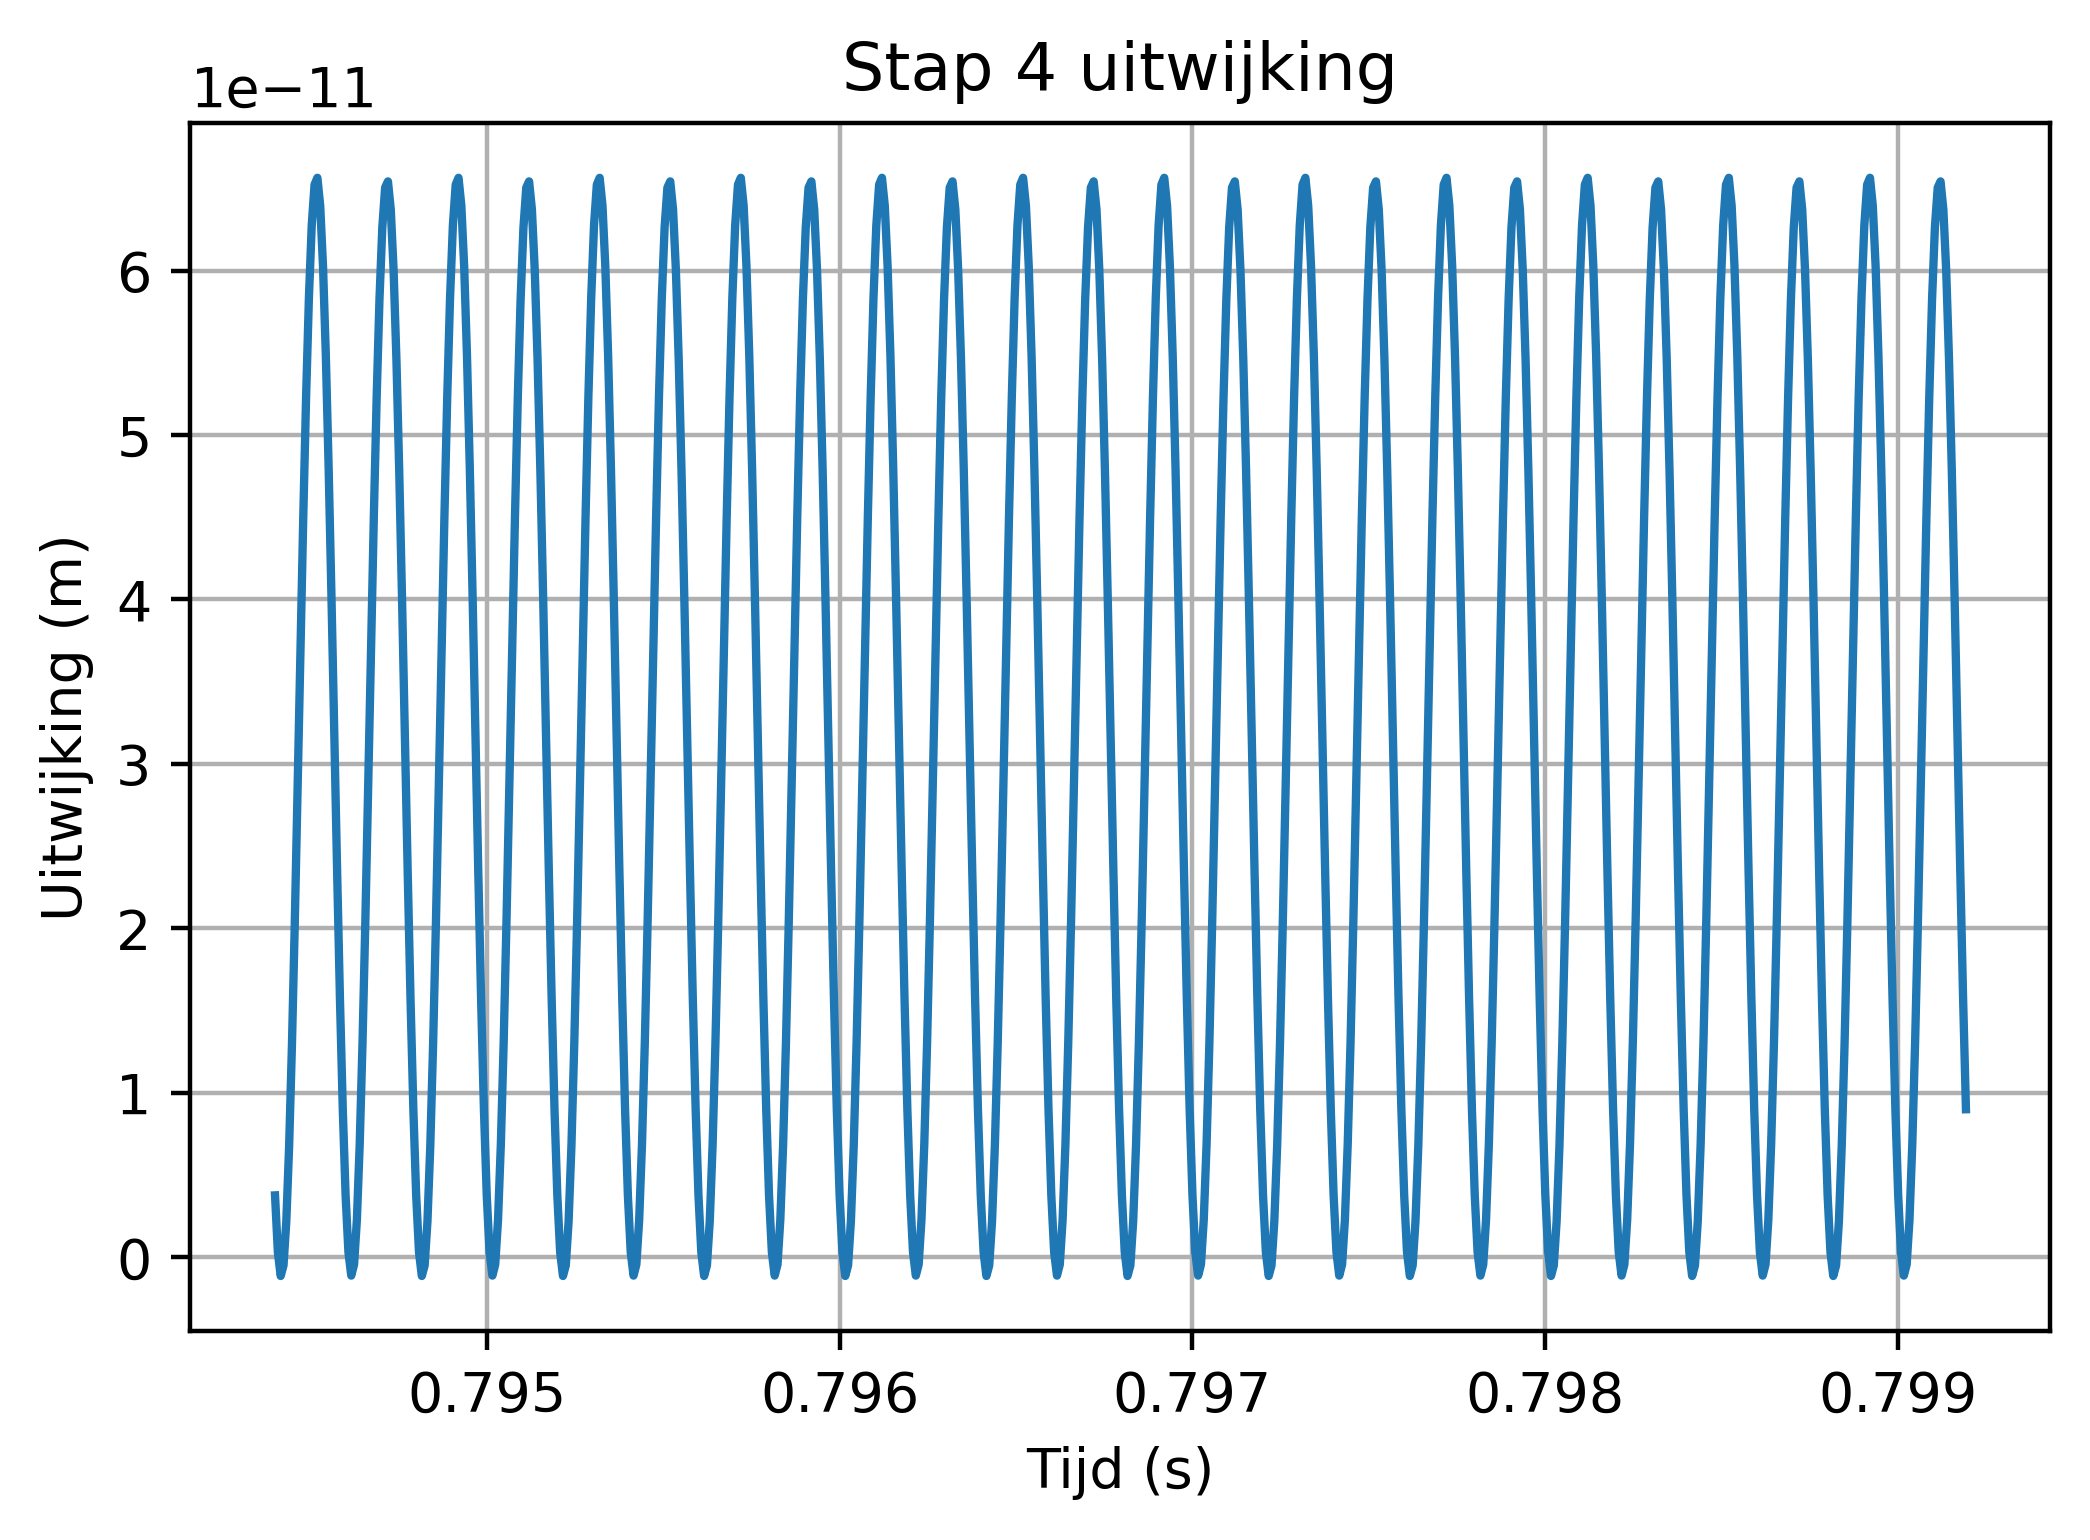

In [82]:
plt.figure(dpi = 400)
plt.xlabel("Tijd (s)")
plt.ylabel("Uitwijking (m)")
plt.title("Stap 4 uitwijking")
plt.grid()
plt.plot(tijd_stuk, y_stuk)

In [83]:
'Stap 5?'

'Stap 5?'

In [84]:
vy = np.zeros_like(tijd)
for tvy in range(1,Nstap-1):
    vy[tvy+1]= (y[tvy-1] - y[tvy])/dt
print(len(vy))

100001


In [85]:
vy_stuk = vy[99300:99900]

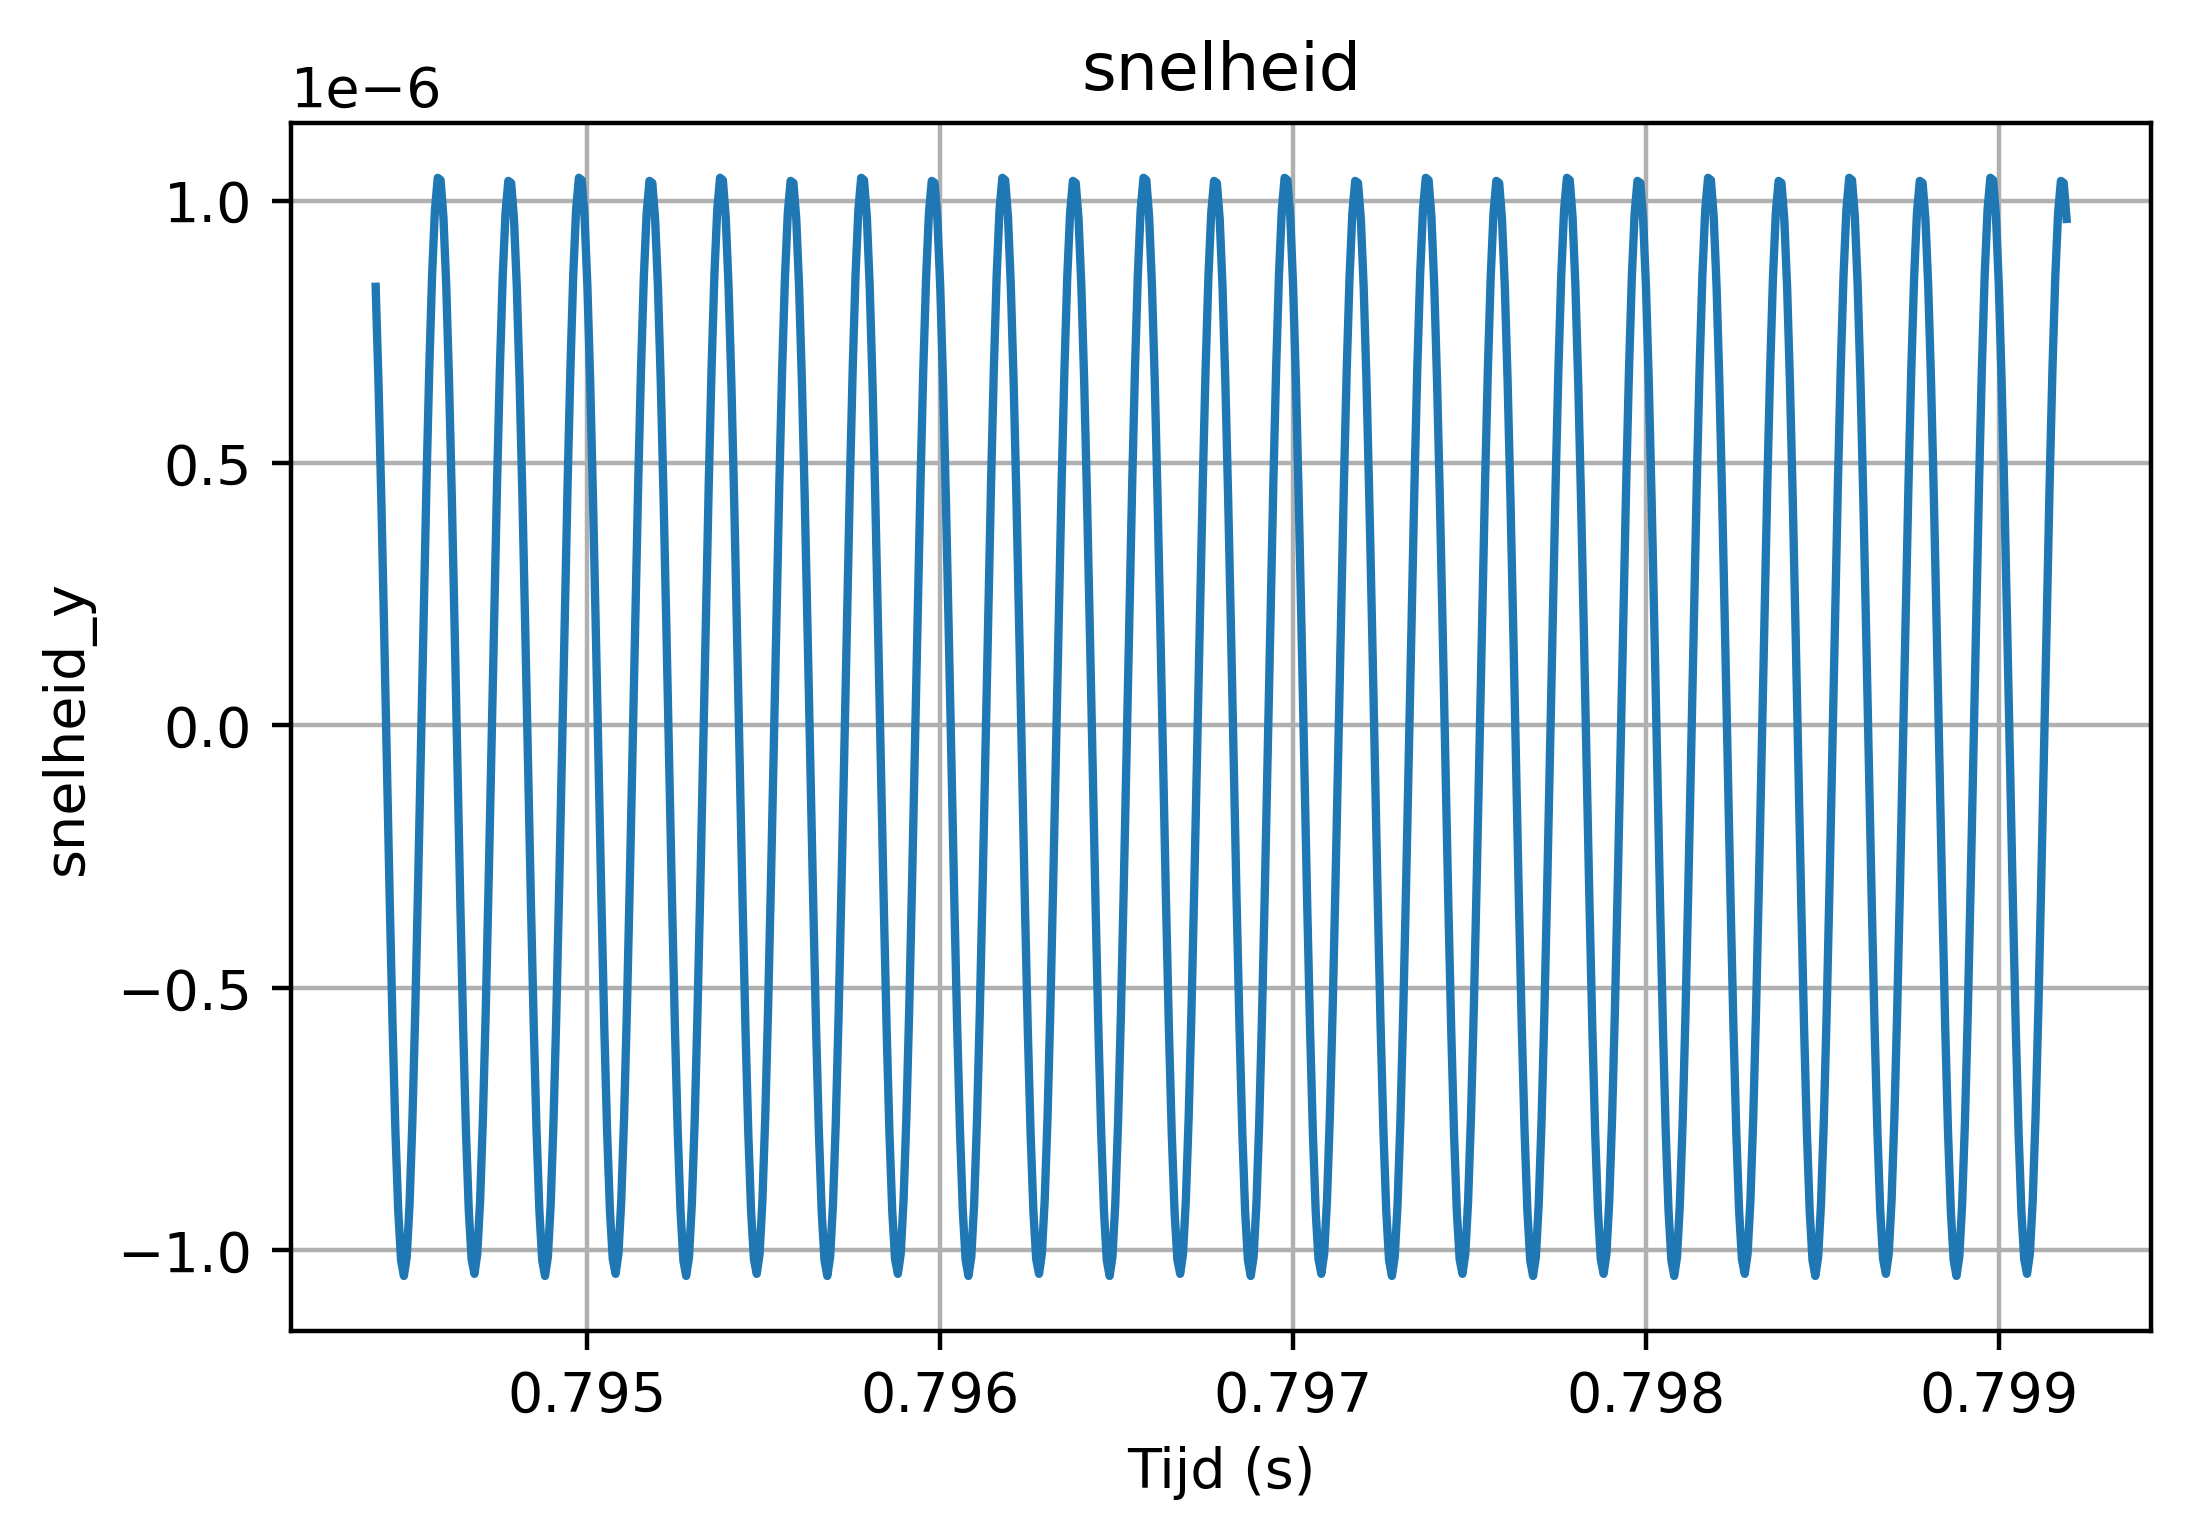

In [86]:
plt.figure(dpi = 400)
plt.xlabel("Tijd (s)")
plt.ylabel("snelheid_y")
plt.title("snelheid")
plt.grid()
plt.plot(tijd_stuk, vy_stuk)

In [97]:
Vdc = 15
N_sense = 40
E0 = 8.854*10**-12
w = 3*10**-6
l_sense = 200*10**-6
d_sense = 2*10**-6

I_sense = np.zeros_like(tijd)
I_sense[0] = 0

for tu in range (1,Nstap-1):
    I_sense[tu+1] = (N_sense*l_sense*w*E0*Vdc*(1/(d_sense-y[tu])))/dt

In [98]:
I_sense_stuk = I_sense[99300:99900]

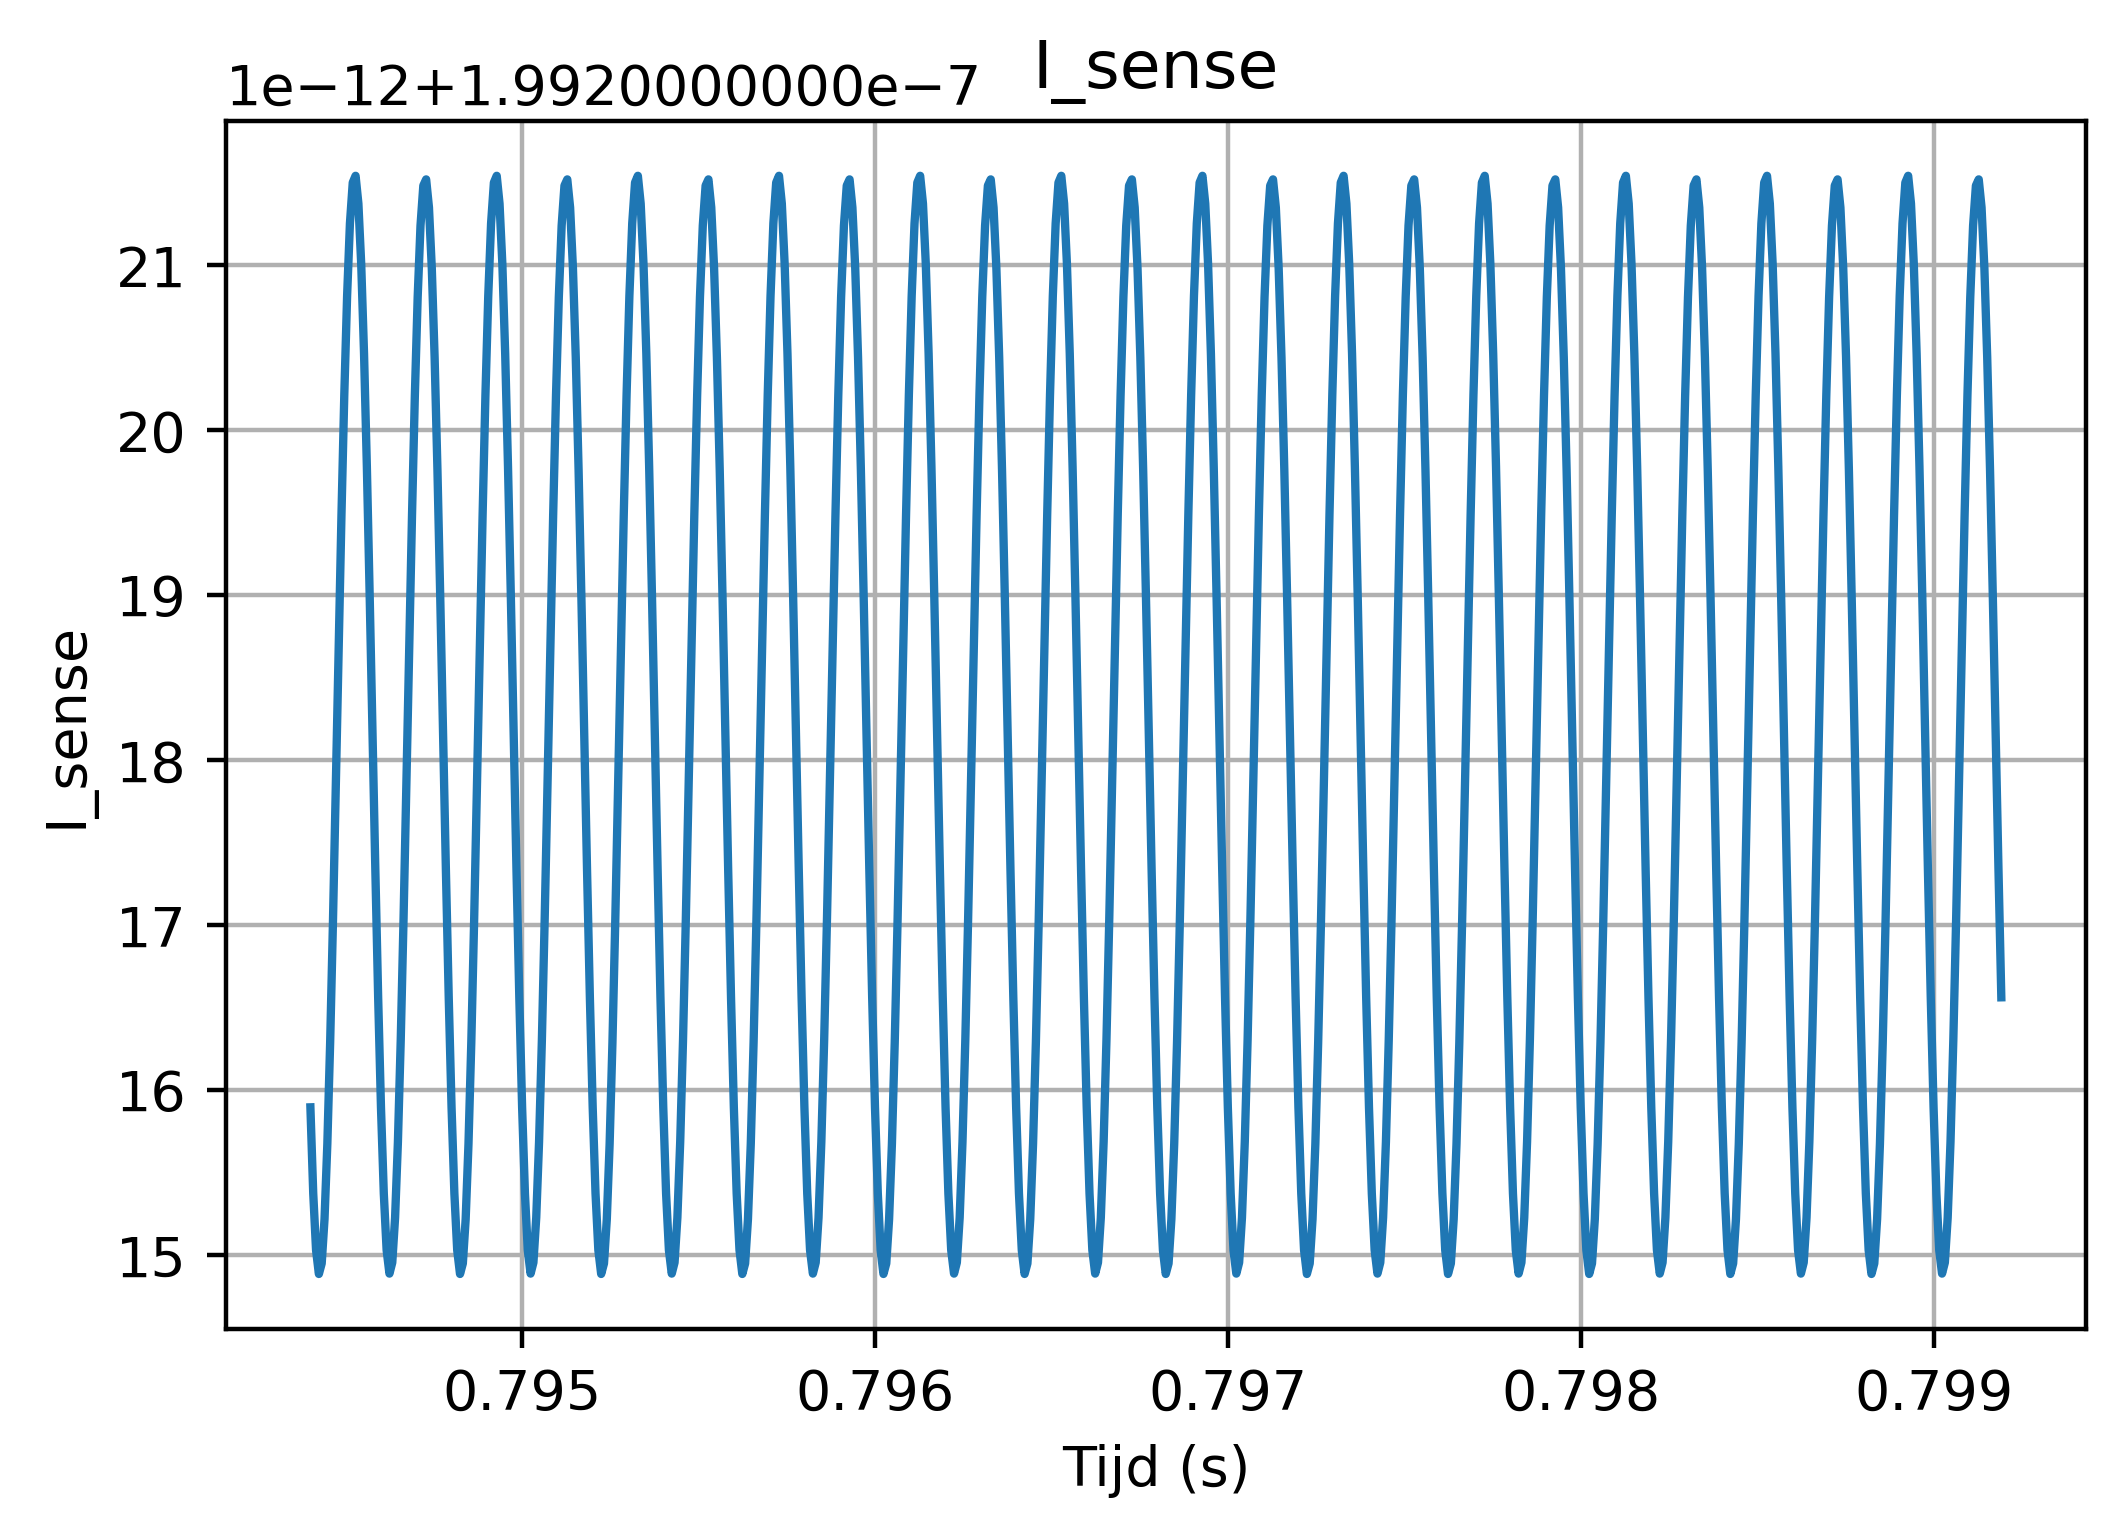

In [99]:
plt.figure(dpi = 400)
plt.xlabel("Tijd (s)")
plt.ylabel("I_sense")
plt.title("I_sense")
plt.grid()
plt.plot (tijd_stuk, I_sense_stuk)

In [100]:
print(np.amax(I_sense[round(0.8*Nstap):-1]))

1.9922153996386352e-07


In [101]:
Amp1 = np.amax(Fel[round(0.8*Nstap):-1])
Amp2 = np.amax(x[round(0.8*Nstap):-1])
Amp3 = np.amax(Fcoriolis[round(0.8*Nstap):-1])
Amp4 = np.amax(y[round(0.8*Nstap):-1])
Amp5 = np.amax(I_sense[round(0.8*Nstap):-1])

In [102]:
Verhouding1 = Amp2/Amp1
Verhouding2 = Amp3/Amp2
Verhouding3 = Amp4/Amp3
Verhouding4 = Amp5/Amp4
Verhoudingtot = Amp5/Amp1

In [103]:
print("Amp1 =" + str(Amp1))
print("Amp5 =" + str(Amp5))

Amp1 =1.8078495992886185e-09
Amp5 =1.9922153996386352e-07


In [104]:
print("Verhouding1 =" + str(Verhouding1))
print("Verhouding2 =" + str(Verhouding2))
print("Verhouding3 =" + str(Verhouding3))
print("Verhouding4 =" + str(Verhouding4))
print("Verhoudingtot =" + str(Verhoudingtot))

Verhouding1 =22.69345148037325
Verhouding2 =0.001631162757748495
Verhouding3 =0.9810901230994454
Verhouding4 =3034.360954721218
Verhoudingtot =110.19807180987644
